# Maximum likelihood estimation

## [Models in Population Biology](http://modelspopbiol.yoavram.com)
## Yoav Ram

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns
sns.set(
    style='white',
    context='talk'
)
red, blue, green = sns.color_palette('Set1', 3)

# Statistical inference: the frequentist approach

Statistical inference uses scientific models to explain observable phenomena.

Statistical inference applies mathematical and computational methods to draw conclusions on _Models_ from the _Theoretical World_ using  _Data_ from the _Real World_.

![Big picture of statistical inference](../resources/bigpic.png)

**Fig 1. from [Kass 2011](http://www.stat.cmu.edu/~kass/papers/bigpic.pdf).**


The two major approaches to statistical inference (and statistics as a whole) are the **frequentist** and **Bayesian** approaches, but in this course we will use both, in the spirit of [_Statistical pragmatism_](http://www.stat.cmu.edu/~kass/papers/bigpic.pdf).

Today we will deal with the **frequentist approach**.

# Poisson model for count data

This example follows a [blog post by Jake VanDerPlas](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/).

Imagine that we count the number of [European red mites](https://en.wikipedia.org/wiki/Panonychus_ulmi) on apple leaves.

Denote the number of leaves by $n$, where the $i^{\rm th}$ measurement $X_i$ reports the observed number of mites on leaf $i$.
We assume that $X_i$ is Poisson-distributed around the expected number of mites $\mu$, 
$$
X_i \sim Poi(\mu)
$$

So $Poi(\mu)$ is our **model**, and $\{X_i\}$ is the data.

The question is, given this data $\{X_i\}$, what is our best estimate of $\mu$? 
And the next question would be: does the model provide a good fit to the data?

Generating this estimate is the objective of **statistical inference**: making conclusions on observable phenomea by applying mathematical methods to data and models.

## Synthetic data from Poisson model

We start by simulating data before using real data.

In [162]:
np.random.seed(1)

# expected number of mites on a leaf
μ = 10  
# number of measurements
n = 50 
# n measurements of the mites
X = np.random.poisson(μ, size=n)

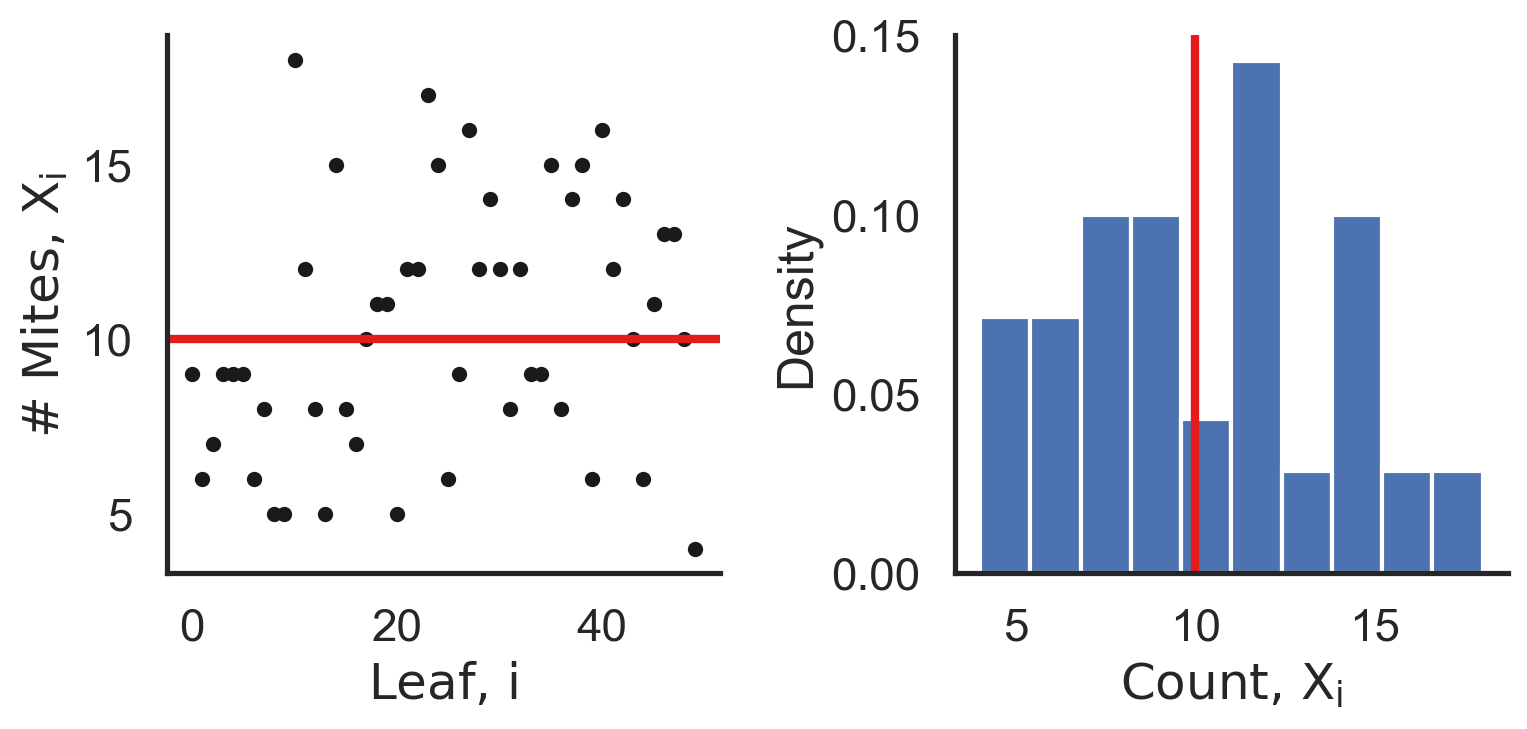

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

ax = axes[0]
ax.plot(np.arange(n), X, '.k')
ax.axhline(μ, linewidth=3, color=red)
ax.set_xlabel("Leaf, $i$")
ax.set_ylabel("Count, $X_i$")

ax = axes[1]
ax.hist(X, bins=10, density=True)
ax.axvline(μ, linewidth=3, alpha=1, color=red)
ax.set_ylabel("Density")
ax.set_xlabel("Count, $X_i$")

fig.tight_layout()
sns.despine()

In this toy example we already know the
true value of $\mu$, but the question is this: **given our measurements $\{X_i\}$, what is our best estimate of the true $\mu$?**

## Maximum likelihood estimation with Poisson distribution

Which mathematical method can we use to make conclusions on $\mu$ from $\{X_i\}$?

Maximum likelihood is a very common and popular approach to statistical inference in which we look for the model that has the maximum probability to generate the observed data.

Formally, the **likelihood $\mathcal{L}$ of the model 
$$
X_i \sim Poi(\mu)
$$
given observed data $\{(X_i)\}_i$ is the probability of seeing data given the model:**
$$
\mathcal{L}(\mu~|~X) = 
\prod_{i=1}^n P(x_i~|~\mu)
$$

We assume (or even know) that the distribution of the measurements $\{X_i\}$ is Poisson.
Therefore, the probability to see $X_i$ given $\mu$ is
$$
P(X_i~|~\mu) = 
\frac{\mu^{X_i} e^{-\mu}}{X_i!}
$$

So the likelihood $\mathcal{L}$ is a product of exponents.
Therefore, we take the log-likelihood $\log\mathcal{L}$:

$$
\log\mathcal{L}(\mu~|~X) = 
\sum_{i=1}^n \log{P(X_i~|~\mu)}
$$

We use `scipy` to implement the `log_likelihood(μ, X)` function, wjocj takes $\mu$, the expected value of a Poisson distribution, and $X$, and array of measurements, and returns $\log\mathcal{L}(\mu~|~X)$, the log-likelihood of $\mu$ given we saw $X$, which equals $\log P(X \mid \mu)$, the log-probability of seeing $X$ if $\mu$ is true.

In [164]:
def log_likelihood(μ, X):
    return scipy.stats.poisson(μ).logpmf(X).sum()

Here's a plot of the log-likelihood function, with the true value in red circle and the measured values in black dots.

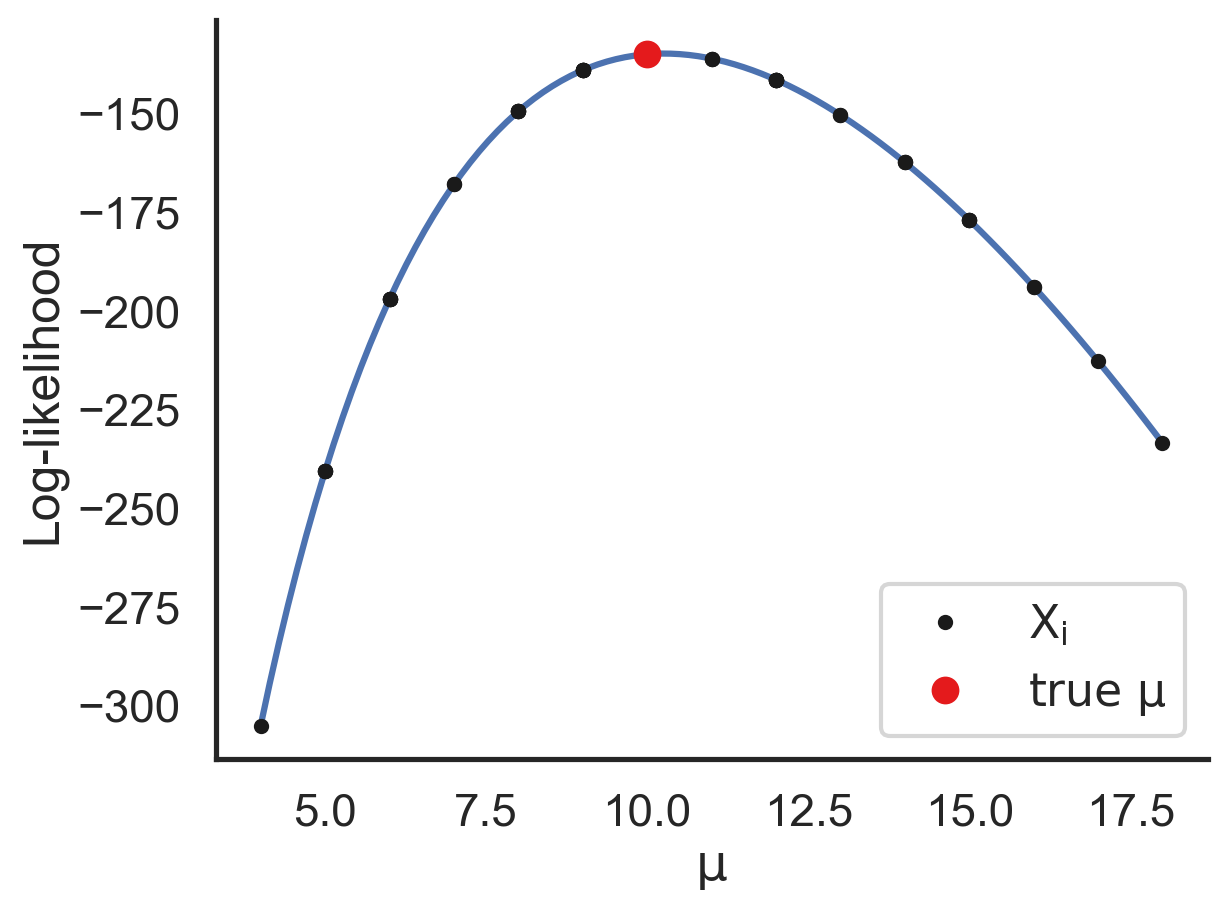

In [165]:
X_range = np.linspace(X.min(), X.max(),100)
plt.plot(X_range, [log_likelihood(x, X) for x in X_range])
plt.plot(X, [log_likelihood(x, X) for x in X], '.k', label='$X_i$')
plt.plot(μ, log_likelihood(μ, X), 'o', color=red, label='true $μ$')
plt.xlabel("$\mu$")
plt.ylabel("Log-likelihood")
plt.legend()
sns.despine()

The estimated value $\mu$ that maximizes the log-likelihood $\log\mathcal{L}$ will be our **maximum likelihood estimate $\hat{\mu}$**.

We can find this analytically by solving for the root of the derivative of the normal approximation of the log-likelihood:

$$
\frac{d\log\mathcal{L}}{d\hat{\mu}}
\\ =
\frac{d}{d\hat{\mu}} \sum_{i=1}^n{\log{\frac{\hat{\mu}^{X_i} e^{-\hat{\mu}}}{X_i!}}}
\\ =
\frac{d}{d\hat{\mu}} \sum_{i=1}^n{\log{\hat{\mu}^{X_i}} + \log{e^{-\hat{\mu}}} - \log{(X_i!)}}
\\ =
\frac{d}{d\hat{\mu}} \sum_{i=1}^n{X_i \log{\hat{\mu}} -\hat{\mu} - \log{(X_i!)}}
\\ =
\sum_{i=1}^n{\frac{X_i}{\hat{\mu}} - 1}
\\ =
\frac{1}{\hat{\mu}} \sum_{i=1}^n{X_i} - n
$$

So
$$
\frac{d\log\mathcal{L}}{d\hat{\mu}} = 0 \Rightarrow
\hat{\mu} = \frac{1}{n}\sum_{i=1}^n{X_i}
$$
So the estimate $\hat{\mu}$ is the **arithmetic mean** $\bar{X}=\frac{1}{n}\sum_{i=1}^n{X_i}$!

μ = 10 
μ_hat = 10.26


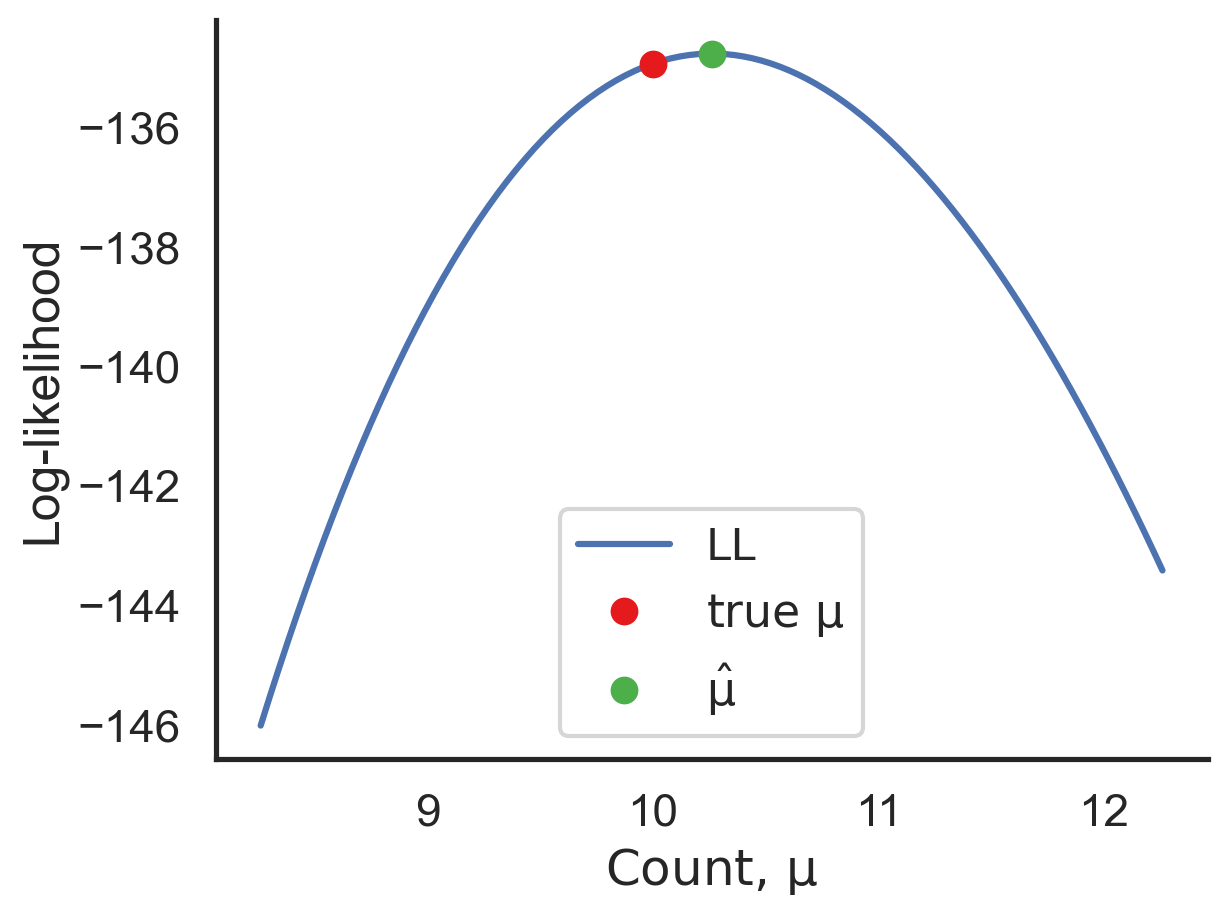

In [166]:
μ_hat = X.mean()
print("μ = {} \nμ_hat = {}".format(μ, μ_hat))

X_range = np.linspace(μ_hat-2, μ_hat+2, 100)
plt.plot(X_range, [log_likelihood(x, X) for x in X_range], label='LL')
plt.plot(μ, log_likelihood(μ, X), 'o', color=red, label='true $μ$')
plt.plot(μ_hat, log_likelihood(μ_hat, X), 'o', color=green, label='$\hat{μ}$')

plt.xlabel("Count, $\mu$")
plt.ylabel("Log-likelihood")
plt.legend()
sns.despine()

The [Cramér–Rao bound](https://en.wikipedia.org/wiki/Cramér–Rao_bound) provides a lower bound for the precision of this estimate

$$
var(\hat{\mu}) \ge \frac{1}{\mathcal{I}}
$$

where $\mathcal{I}$ is Fisher information, defined as:
$$
\mathcal{I} = - \mathbf{E}\Big[\frac{d^2\log\mathcal{L}}{d\hat{\mu}^2} \Big]
$$

So, we have
$$
\frac{d\log\mathcal{L}}{d\hat{\mu}} =
\frac{1}{\hat{\mu}} \sum_{i=1}^n{x_i} - n \Rightarrow \\
\frac{d^2\log\mathcal{L}}{d\hat{\mu}^2}  =
-\frac{1}{\hat{\mu}^2} \sum_{i=1}^n{x_i} \Rightarrow \\
\mathcal{I} =
- \mathbf{E}\Big[-\frac{1}{\hat{\mu}^2} \sum_{i=1}^n{x_i} \Big] = 
\frac{1}{\hat{\mu}^2} \mathbf{E}\Big[ \sum_{i=1}^n{x_i} \Big] =
\frac{n}{\hat{\mu}} 
\Rightarrow \\
var(\hat{\mu}) \ge
\frac{\hat{\mu}}{n}  \Rightarrow \\
\sigma_{\hat{\mu}} \ge
\sqrt{\frac{\hat{\mu}}{n}}
$$

μ = 10 
μ_hat = 10.26 +/- 0.452990066116245


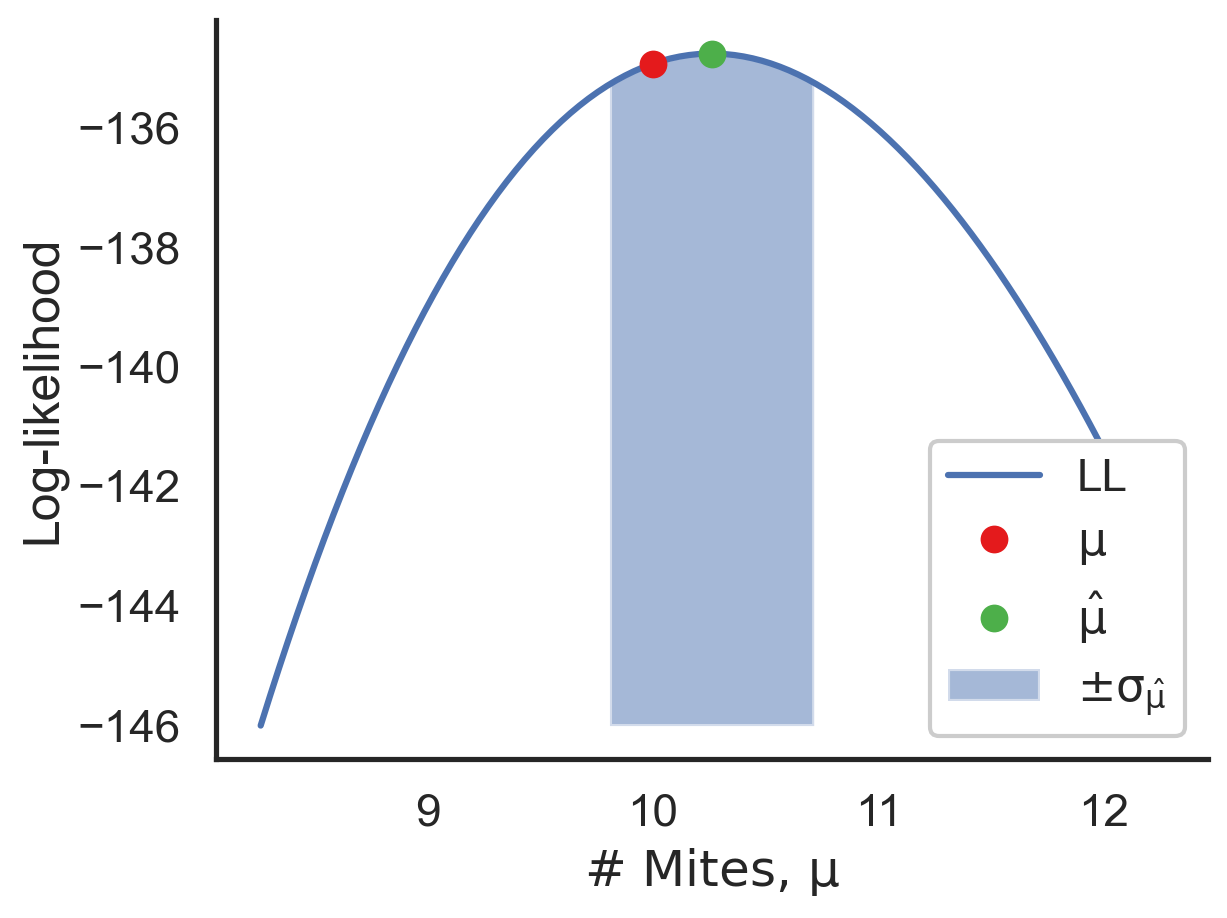

In [103]:
σ_hat = np.sqrt(μ_hat/n)
print("μ = {} \nμ_hat = {} +/- {}".format(
    μ, μ_hat, σ_hat))

X_range = np.linspace(μ_hat-2, μ_hat+2, 100)
plt.plot(X_range, [log_likelihood(x, X) for x in X_range], label='LL')
plt.plot(μ, log_likelihood(μ, X), 'o', color=red, label='$μ$')
plt.plot(μ_hat, log_likelihood(μ_hat, X), 'o', color=green, label='$\hat{μ}$')

X_range = np.linspace(μ_hat-σ_hat, μ_hat+σ_hat)
plt.fill_between(X_range, log_likelihood(μ_hat-2, X), 
                 [log_likelihood(x, X) for x in X_range], 
                 alpha=0.5, label='$\pm \sigma_{\hat{\mu}}$')
plt.xlabel("# Mites, $\mu$")
plt.ylabel("Log-likelihood")
plt.legend(loc='lower right', framealpha=1)
sns.despine()

## Goodenss-of-fit to Poisson model

How good is the fit of the Poisson model to these data?
We can compare the histogram to the inferred Poisson distribution.

Also, in a Poisson model, the variance equals the expected value.
We estimate the variance (we set `ddof=1` to apply [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction)) and compare it to the estimated expected value:

In [104]:
def chitest(X, distribution, ddof=0):
    n = X.size
    obser, bins = np.histogram(X, bins=np.arange(0, X.max()*2))
    bins = bins[:-1]
    expec = distribution.pmf(bins)
    expec /= expec.sum() # normalize (if there is more density outside of bins)
    expec *= obser.sum() # convert from probability to frequency
# standard chi2 test
#     χ2 = ((expec - obser)**2 / expec).sum()
#     pval = scipy.stats.chi2(n-1-ddof).sf(χ2)
#     return χ2, pval  
# modified test, see docs
    return scipy.stats.power_divergence(obser, expec, ddof=ddof)


χ2 = 15.34, P-value = 1


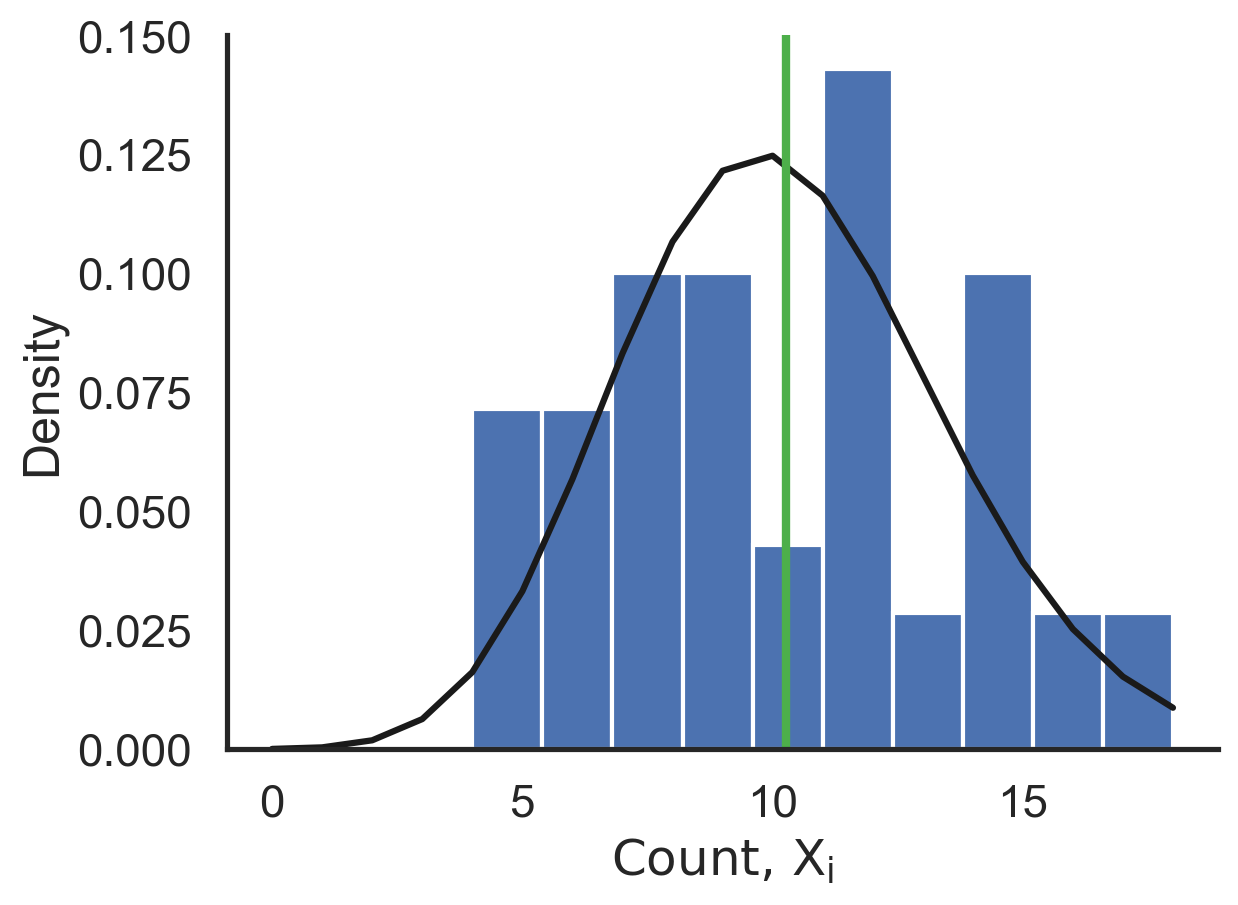

In [105]:
def goodness_of_fit_poisson(μ_hat, X):
    poisson = scipy.stats.poisson(μ_hat)
    χ2, pval = chitest(X, poisson, 1)
    print("χ2 = {:.2f}, P-value = {:.2g}".format(χ2, pval))
    
    fig, ax = plt.subplots()
    ax.hist(X, bins=10, density=True)
    counts = np.arange(X.max()+1)
    ax.plot(counts, poisson.pmf(counts), color='k')
    ax.axvline(μ_hat, linewidth=3, alpha=1, color=green)
    ax.set_ylabel("Density")
    ax.set_xlabel("Count, $X_i$")

    fig.tight_layout()
    sns.despine()
    
goodness_of_fit_poisson(μ_hat, X)

Using a simple chi-square test for goodness-of-fit, we do not reject the hypothesis that this is a Poisson distribution.

## Inference on real data with Poisson model

We will use data collected by Phillip Garman in 1951 and published by [Bliss and Fisher 1953](https://doi.org/10.2307/3001850) (yes, the same Fisher).

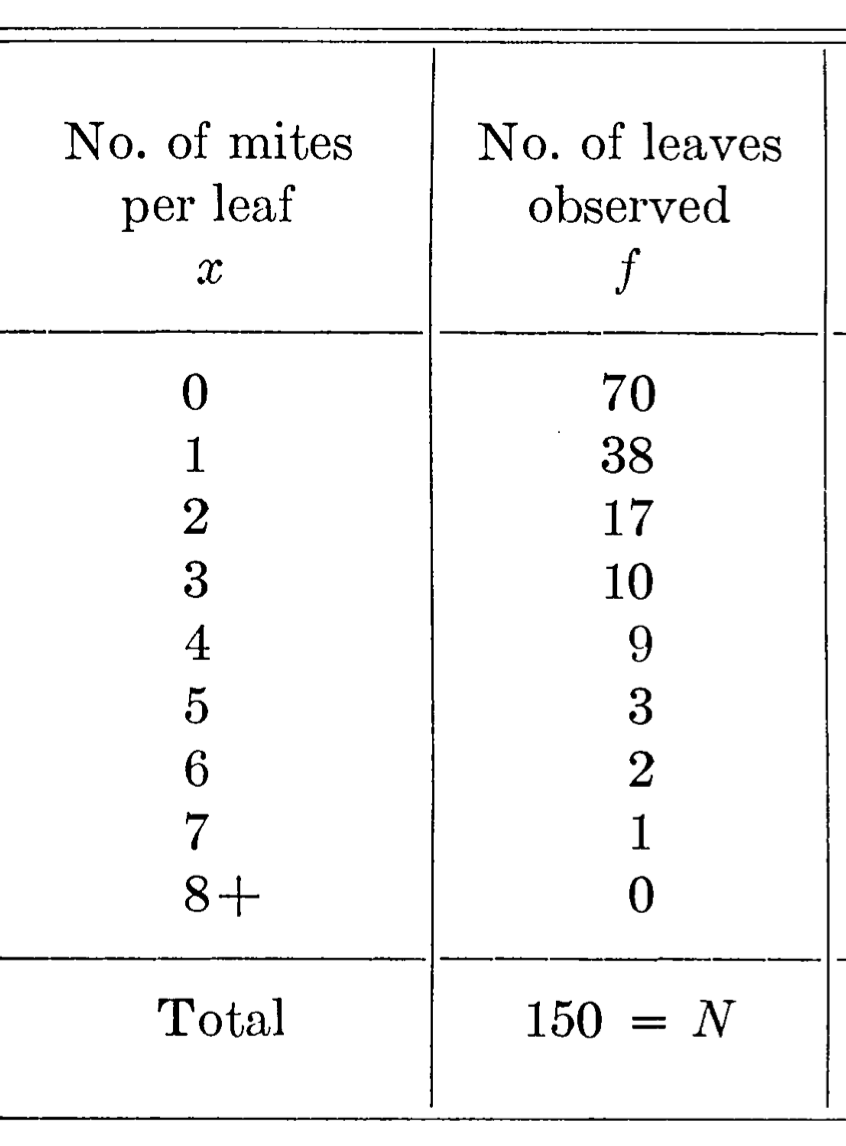

In [106]:
X_real = [0]*70 + [1]*38 + [2]*17 + [3]*10 + [4]*9 + [5]*3 + [6]*2 + [7]
X_real = np.array(X_real)
np.random.shuffle(X_real)
X = X_real
n = X.size

In [107]:
μ_hat = X.mean()
σ_hat = np.sqrt(μ_hat/n)
print("μ_hat = {:.4f} +/- {:.4f}".format(μ_hat, σ_hat))

μ_hat = 1.1467 +/- 0.0874


χ2 = 99.02, P-value = 2.8e-16


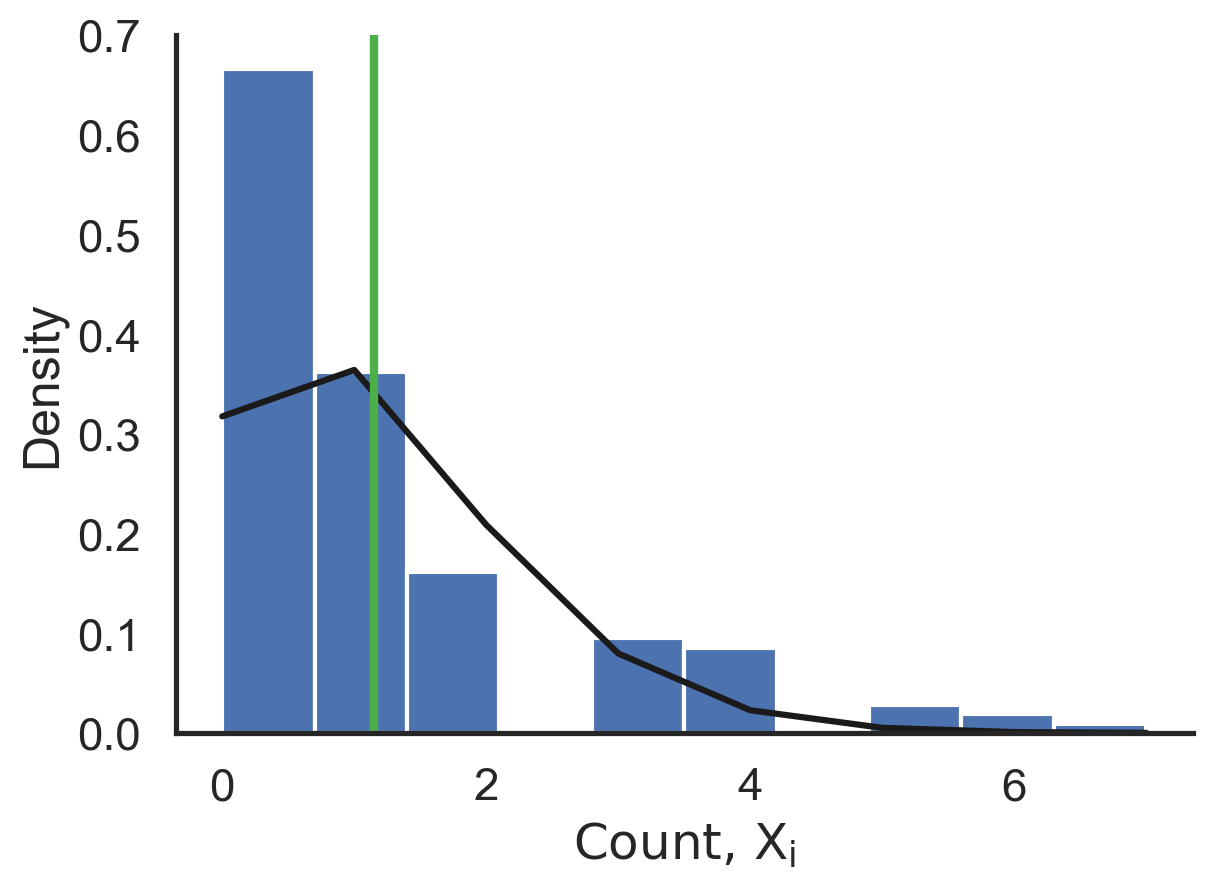

In [109]:
goodness_of_fit_poisson(μ_hat, X)

The histogram does not seem to fit the Poisson distribution, and the P-value is very low, such that we reject the Poisson model.
Indeed, the variance is about twice as large as the mean.

So what now?

# Over-dispersed Poisson model for count data

Here we assume that the measurements $\{X_i\}$ are still drawn from a Poisson distribution, but the expected values $\mu_i$ changes from leaf to leaf.
We assume it is drawn from a [Gamma distrubtion](https://en.wikipedia.org/wiki/Gamma_distribution#Related_distributions) with shape $r$ and scale $\phi$ ( with expected value $r\phi$ and variance $r\phi^2$):
$$
\mu_i \sim Gamma(r, \phi) \\
X_i \sim Poi(\mu_i)
$$

We note the model parameters as $\theta = (r, \phi)$.

Our data is still $\{X_i\}$, but the model is now _compound_, as it includes a model for the measurements $Poi(\mu_i)$ and a model for the Poisson parameter $Gamma(r, \phi)$.

## Synthetic data from over-dispersed Poisson model
Let's simulate data according to this compound model.

In [113]:
# for reproducibility
np.random.seed(42)
n = 50
θ = (r, ϕ) = 5, 2

μi = np.random.gamma(r, scale=ϕ, size=n)
X = np.random.poisson(μi)

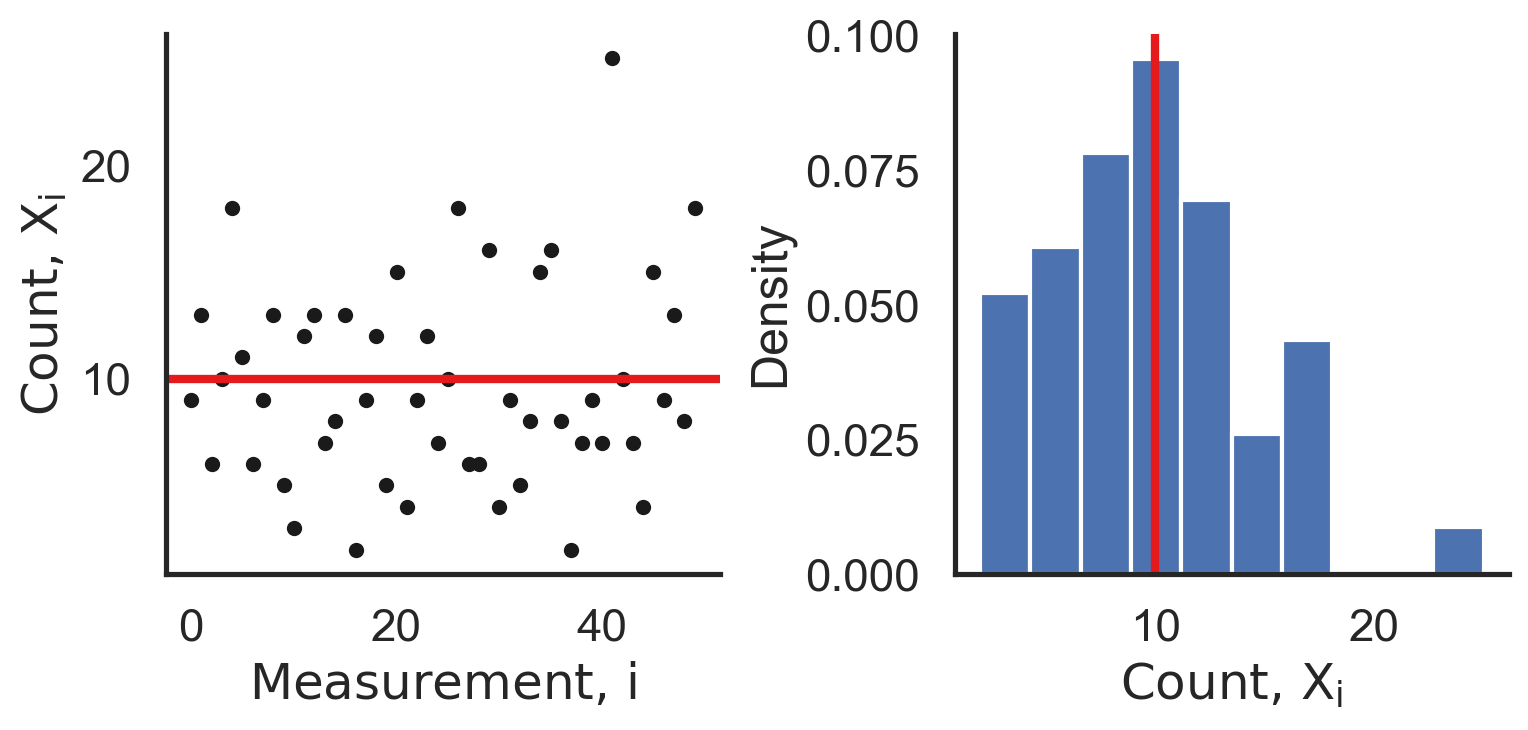

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

ax = axes[0]
ax.plot(np.arange(n), X, '.k')
ax.axhline(r*ϕ, linewidth=3, color=red)
ax.set_xlabel("Measurement, $i$")
ax.set_ylabel("Count, $X_i$")

ax = axes[1]
ax.hist(X, bins=10, density=True)
ax.axvline(r*ϕ, linewidth=3, alpha=1, color=red)
ax.set_ylabel("Density")
ax.set_xlabel("Count, $X_i$")

fig.tight_layout()
sns.despine()

## Goodness-of-fit to Poisson model

Let's start by testing how this data fits the Poisson model.

χ2 = 1116.51, P-value = 4.4e-203


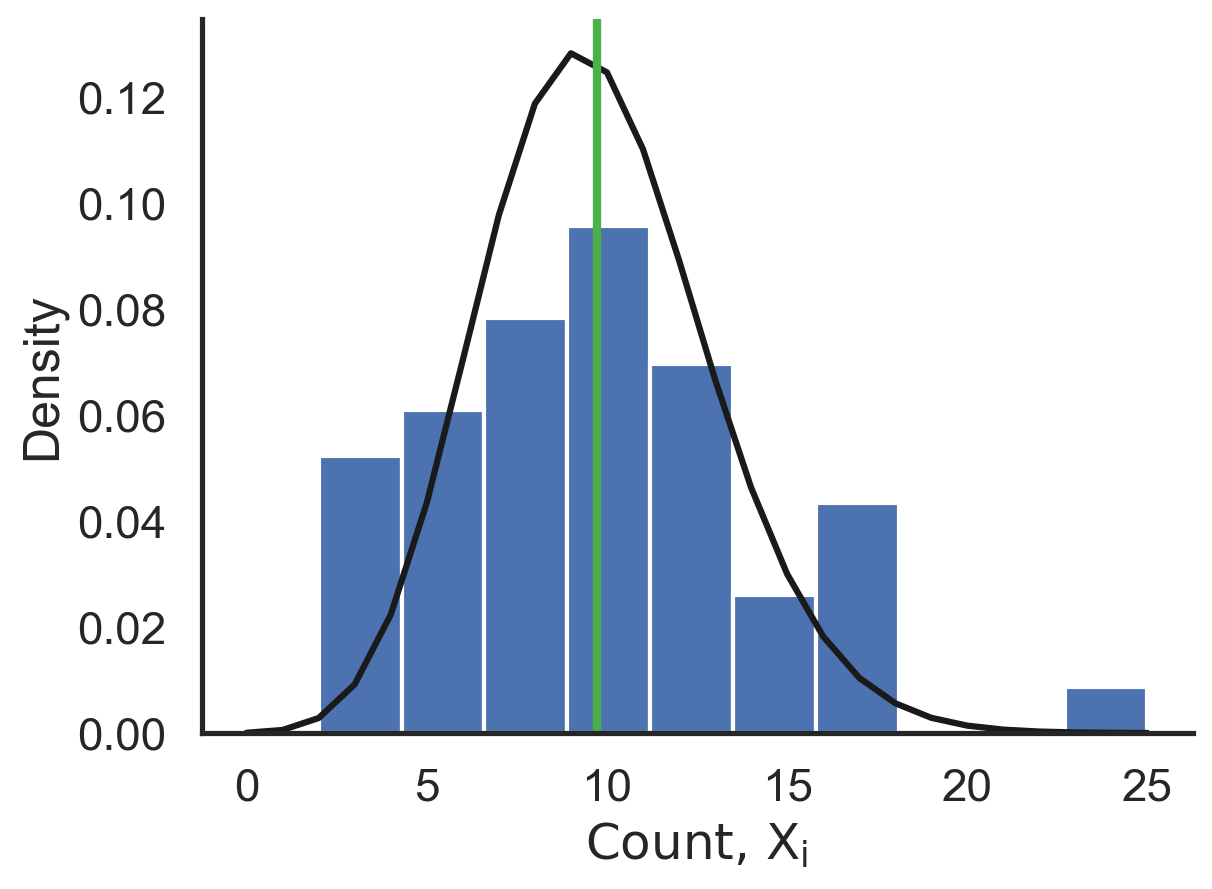

In [115]:
goodness_of_fit_poisson(X.mean(), X)

So this indeed does not fit the Poisson model.

## Maximum likelihood estimation with negative binomial distribution

Interestingly, this compound model gives rise to the [Negative Binomial distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution#Statistical_inference), such that
$$
X_i \sim NB(r, p) = Gamma\left(r, \frac{p}{1-p}\right)
$$
and $p=\frac{\phi}{\phi+1}$.
The likelihood function is therefore given by the negative binomial distribution.

$$
\mathcal{L}(r, k~|~X) = 
\prod_{i=1}^{n}{\binom{X_i +r -1}{X_i} (1-p)^{X_i} p^r}
$$

We therefore implement `log_likelihood(θ, X)`, where $\theta = (r, \phi)$ , $p=\phi/(\phi+1)$, and `X` is the data.

In [116]:
def log_likelihood(θ, X):
    r, ϕ = θ
    p = ϕ/(ϕ+1)
    return scipy.stats.nbinom(r, p).logpmf(X).sum()

log_likelihood(θ, X)

-309.99123012375185

To find the maximum likelihood we will use a numerical optimization routine from `scipy.optimize`.

**Note** optimization routines usually _minimize_ rather than _maximize_, so we use the negative log-likelihood.

In [117]:
def neg_log_likelihood(θ, X):
    return -log_likelihood(θ, X)

neg_log_likelihood(θ, X)

309.99123012375185

In [118]:
def mle(X, verbose=False, full_path=False):
    r_guess = X.mean()
    ϕ_guess = r_guess * r_guess / (X.var(ddof=1) - r_guess) # eq 3 in Bliss and Fisher 1953

    return scipy.optimize.fmin(
        func=neg_log_likelihood, # function to minimize with respect to first argument
        x0=(r_guess, ϕ_guess),  # initial guess
        args=(X,), # additional arguments to func
        disp=verbose, # no prints
        retall=full_path
    )

θ_hat = mle(X, verbose=True)
r_hat, ϕ_hat = θ_hat
print("r = {} \tr_hat = {:.4f}\nϕ = {}\tϕ_hat = {:.4f}".format(r, r_hat, ϕ, ϕ_hat))

Optimization terminated successfully.
         Current function value: 145.571844
         Iterations: 63
         Function evaluations: 120
r = 5 	r_hat = 7.6657
ϕ = 2	ϕ_hat = 0.7887


## Goodness-of-fit to overdispersed Poisson model

Let's see if we got a good fit to the theoretical distribution -- from which we actually sampled.

χ2 = 28.75, P-value = 0.98


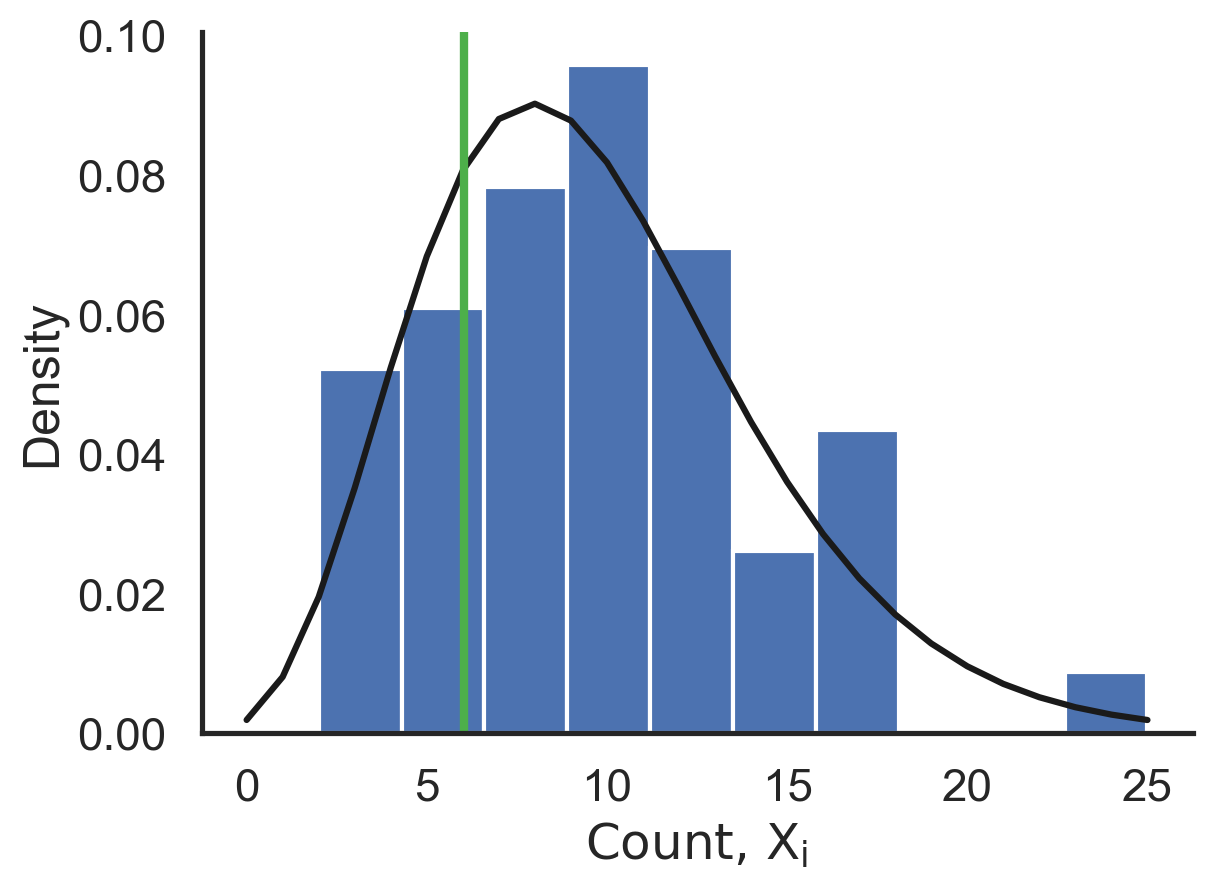

In [119]:
def goodness_of_fit_negbin(θ, X):
    r, ϕ = θ
    p = ϕ/(ϕ+1)
    nbinom = scipy.stats.nbinom(r, p)    
    χ2, pval = chitest(X, nbinom, 2)
    print("χ2 = {:.2f}, P-value = {:.2g}".format(χ2, pval))
    
    fig, ax = plt.subplots()
    ax.hist(X, bins=10, density=True)
    counts = np.arange(X.max()+1)
    ax.plot(counts, nbinom.pmf(counts), color='k')
    ax.axvline(r*ϕ, linewidth=3, alpha=1, color=green)
    ax.set_ylabel("Density")
    ax.set_xlabel("Count, $X_i$")

    fig.tight_layout()
    sns.despine()
    
goodness_of_fit_negbin(θ_hat, X)

OK so we can go ahead and try to infer with this over-dispersed model.

## Inference on real data with over-dispersed Poisson model 

Let's try out this over-dispersed Poisson model on our real "mites on leaves" data.

We reload our data and proceed for the maximum likelihood estimation.

In [120]:
X = X_real

In [121]:
θ_hat = mle(X, verbose=True)
r_hat, ϕ_hat = θ_hat
print("r_hat = {:.4f}\nϕ_hat = {:.4f}".format(r_hat, ϕ_hat))

Optimization terminated successfully.
         Current function value: 222.437154
         Iterations: 36
         Function evaluations: 67
r_hat = 1.0246
ϕ_hat = 0.8935


χ2 = 3.50, P-value = 0.97


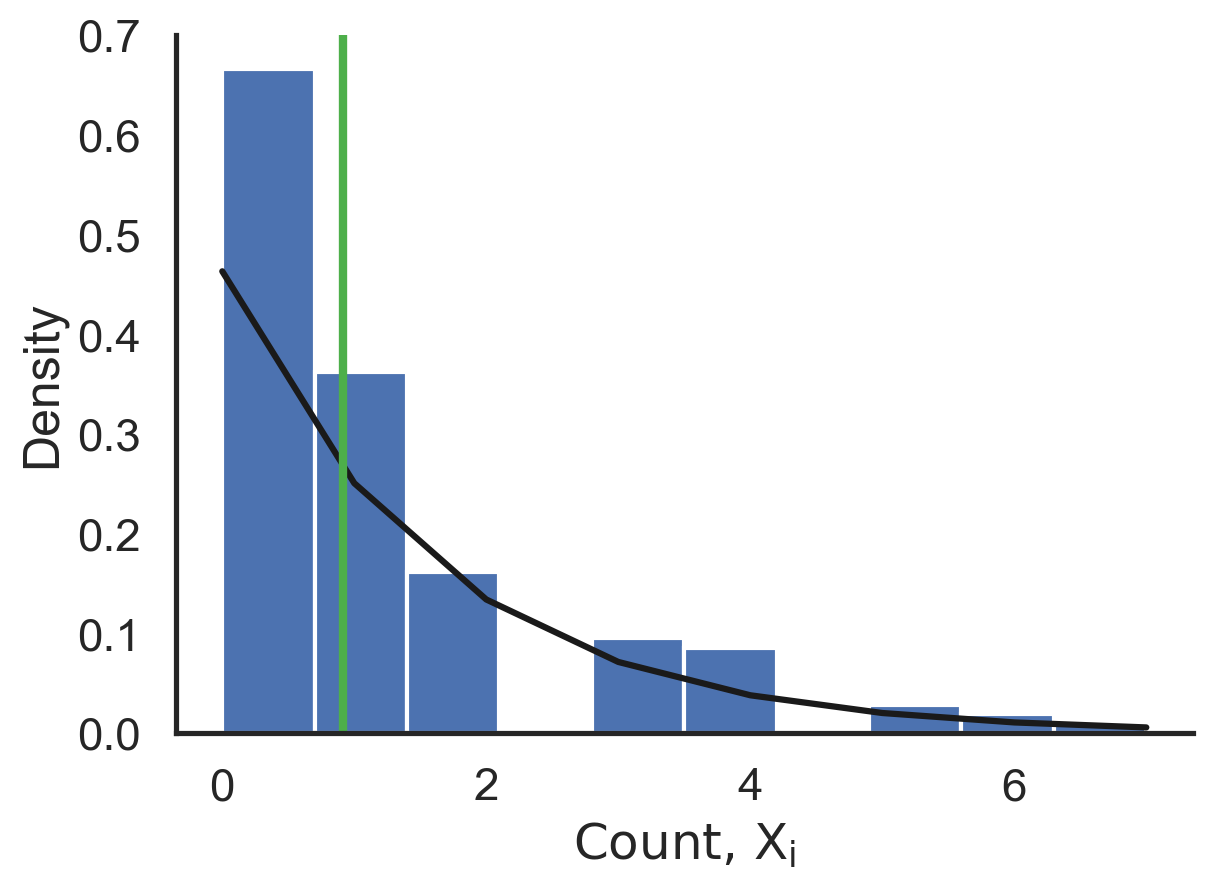

In [122]:
goodness_of_fit_negbin(θ_hat, X)

So we have inferred the values and got a good fit.

## Likelihood surface

We can plot the log-likelihood surface (since there are only two parameters). We'll also call `fmin` again with `retall=True` to get all the $\theta$ it computed at each iterations and plot them as a path on the log-likelihood surface.

In [123]:
θ_hat, θ_path = mle(X, full_path=True)
θ_path = np.array(θ_path)

In [150]:
r_range = np.linspace(0.5, 2, 100)
ϕ_range = np.linspace(0.5, 2, 101)
ll = np.array([
    [log_likelihood((r_, ϕ_), X) for r_ in r_range]
    for ϕ_ in ϕ_range
])

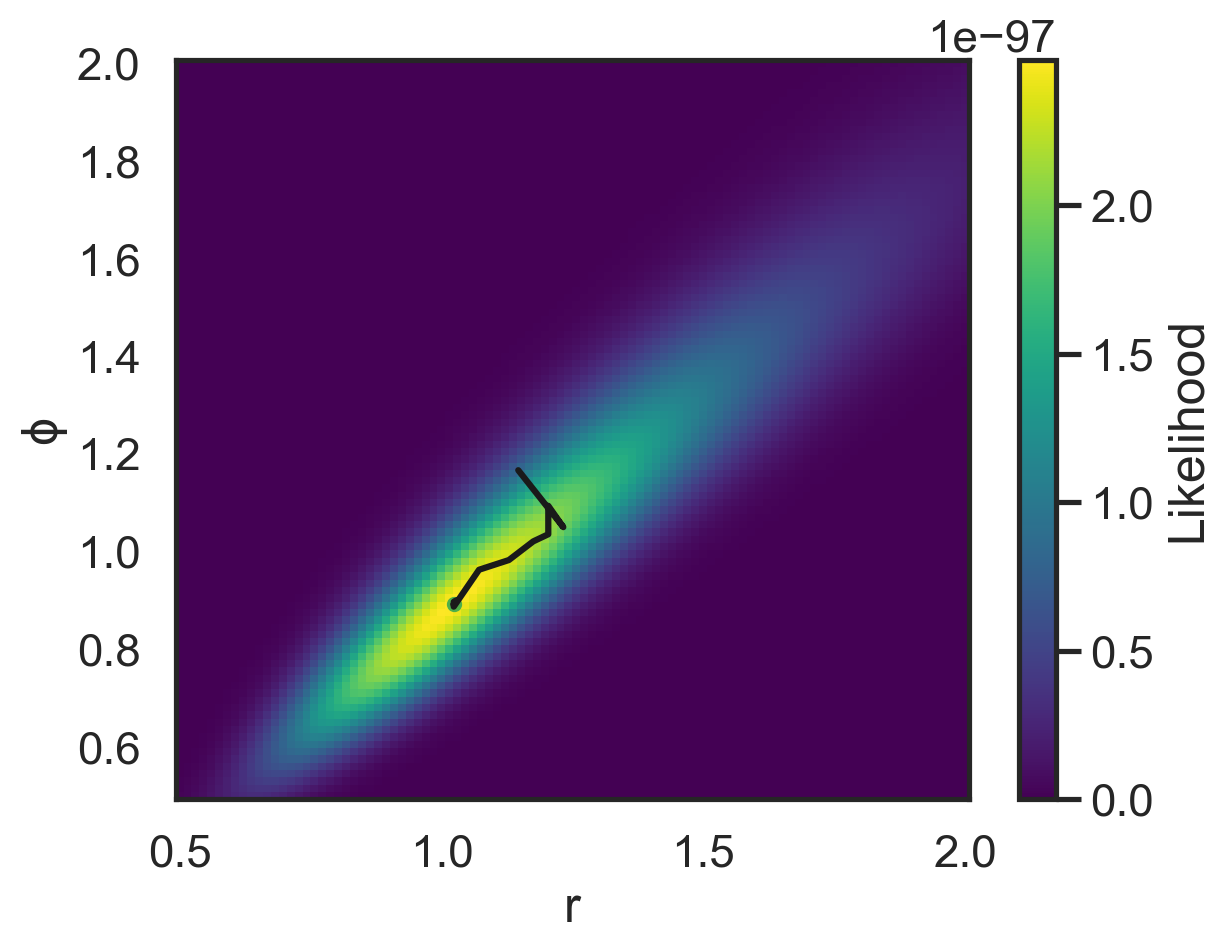

In [152]:
im = plt.pcolormesh(r_range, ϕ_range, np.exp(ll), cmap='viridis')
plt.colorbar(im, label='Likelihood')
plt.plot(r_hat, ϕ_hat, '.', color=green, label='estimate')
plt.plot(θ_path[:,0], θ_path[:,1], '-', color='k')
plt.xlabel('r')
plt.ylabel('ϕ');

As in many cases, the likelihood function shows a dependence between the model parameters.
Nevertheless, it seems like we found a good maximum likelihood estimate.

## Bootstrap
There are several analytic methods to quantify the uncertainty in the parameter estimations.

However, we will a computational method: the **bootstrap method**, in which we estimate the parameters from many resamples of the data.

> Bootstrapping is the practice of estimating properties of an estimator (such as its variance) by measuring those properties when sampling from an approximating distribution. One standard choice for an approximating distribution is the empirical distribution function of the observed data. In the case where a set of observations can be assumed to be from an independent and identically distributed population, this can be implemented by constructing a number of resamples with replacement, of the observed data set (and of equal size to the observed data set).

For efficiency, we parallelize this step using `ThreadPoolExecutor` from Python's standard library.

In [153]:
n_resamples = 1000
resamples = np.random.choice(X, size=(n_resamples, n))

In [154]:
from concurrent.futures import ThreadPoolExecutor

In [155]:
with ThreadPoolExecutor() as exec:
    θ_bootstrap = list(exec.map(mle, resamples))

In [156]:
θ_bootstrap = np.array(θ_bootstrap)
r_bootstrap, ϕ_bootstrap = θ_bootstrap.T

We can inspect the distributions of the estimations to see how far the true and estimated values are compared to all boostrap estimations.

We do this with a **corner plot** using the [corner](http://corner.readthedocs.io) package.

The diagonal plots show the histogram of the parameter estimated, and the joint plot (bottom left) shows a joint 2D histogram of the parameters.
The contours on the joint plot show standard deviations (of a gaussian) to demonstrate confidence regions.
This demonstrates that the truth (in red) is just on the edge of the confidence region, whereas the estimate (green) is right at the middle.

You can see that the joint plot is very similar to the likelihood surface.

In [157]:
from corner import corner

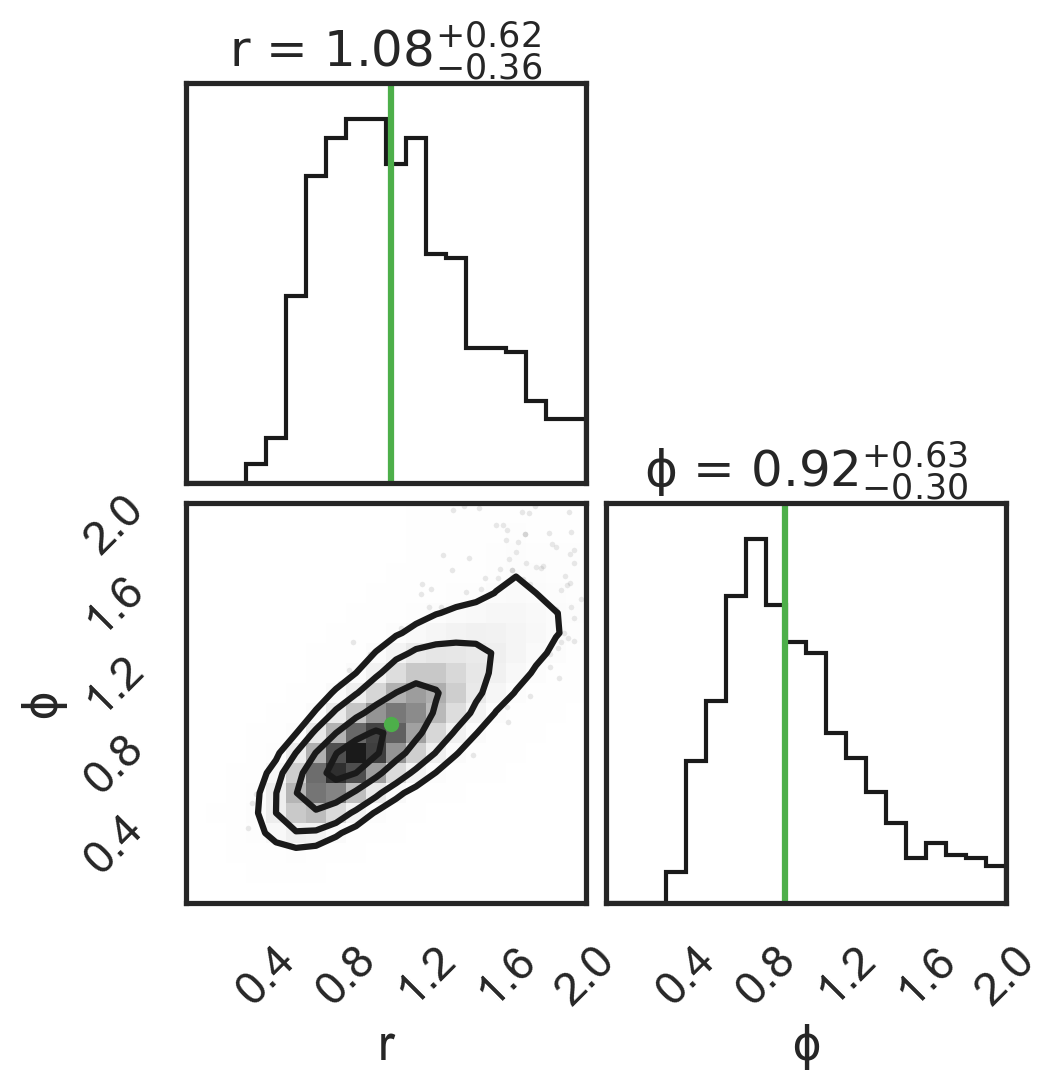

In [160]:
cor = corner(θ_bootstrap, 
    smooth=True,
    labels=['r', 'ϕ'],
    show_titles=True,
    range=[(0, 2), (0, 2)]
)
cor.axes[0].axvline(r_hat, color=green)
cor.axes[3].axvline(ϕ_hat, color=green)
cor.axes[2].plot(r_hat, ϕ_hat, '.', color=green);

In our next meeting we will learn about the Bayesian approach to inference.

# References

- Jake VanDerPlas's series of [blog posts on Frequentists vs. Bayesian inference](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/)
- Kass, Richard E. 2011. [Statistical inference: The big picture](http://www.stat.cmu.edu/~kass/papers/bigpic.pdf). Stat Sci. doi:10.1214/10-STS337
- Bliss, C. I., and R. A. Fisher. 1953. [Fitting the Negative Binomial Distribution to Biological Data](https://doi.org/10.2307/3001850).  Biometrics. doi:10.2307/3001850

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com) and is part of the [_Scientific Computing with Python_](https://scicompy.yoavram.com/) course at IDC Herzliya.

The notebook was written using [Python](http://python.org/) 3.6.5.
Dependencies listed in [environment.yml](../environment.yml).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)